# Уменьшение размера дерева

### !ДЗ - составить дерево с ошибкой меньше 0.001 по датасету test_add.dat
### Посмотреть метод сломанной кости
### 

1) Ограничить максимальную высоту дерева
2) min_sample_split - ?
3) Ограничить количество по входным данным в ноду
4) Ограничить количество листьев в дереве
5) Метод главных компонент. Уменьшение по энергетике (Лучший вариант из всех)
6) Метод главных компонент. Уменьшение по компонентам (Лучший вариант из всех)
7) Метод сломанной кости. Показывает место для остановки. (Посмотреть дома в презентации и интернете). Достаточно грубый, но действенный

## Рисования графа graphviz
```python3
dot_data = tree.export_graphviz(tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree_orig")
```

## Уменьшение высоты дерева

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import graphviz

In [2]:
%matplotlib inline

# fix images
plt.rcdefaults()

In [3]:
f = open('../datasets/test_add.dat', 'r')
X = []
y = []
for row in f:

    a = (list(map(float,row.strip().split())))
    X.append([a[0], a[1], a[2], a[3]])
    y.append(int(a[4]))

# print(X[:10])
# print(Y[:10])

In [4]:
t = tree.DecisionTreeClassifier(max_depth=7)
t = t.fit(X, y)

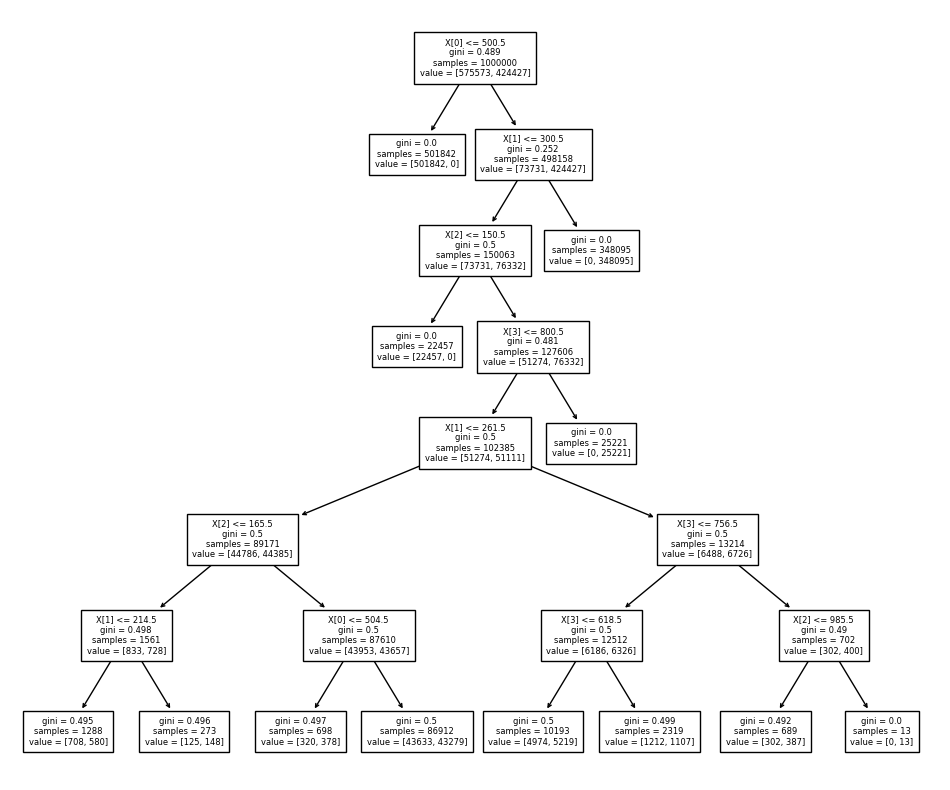

In [5]:
plt.figure(figsize=(12,10))  # set plot size (denoted in inches)
tree.plot_tree(t, fontsize=6)
plt.show()


# save plot
# plt.savefig('tree_high_dpi', dpi=100)

## !min_weight_fraction_leaf - не прошли

### min_samples_split = 10000 . При входе в ноду происходит сравнение на размер min sample. Если он органичен, то заканчивается

In [6]:
min_sample_tree = tree.DecisionTreeClassifier(min_samples_split=100000)
min_sample_tree = min_sample_tree.fit(X, y)

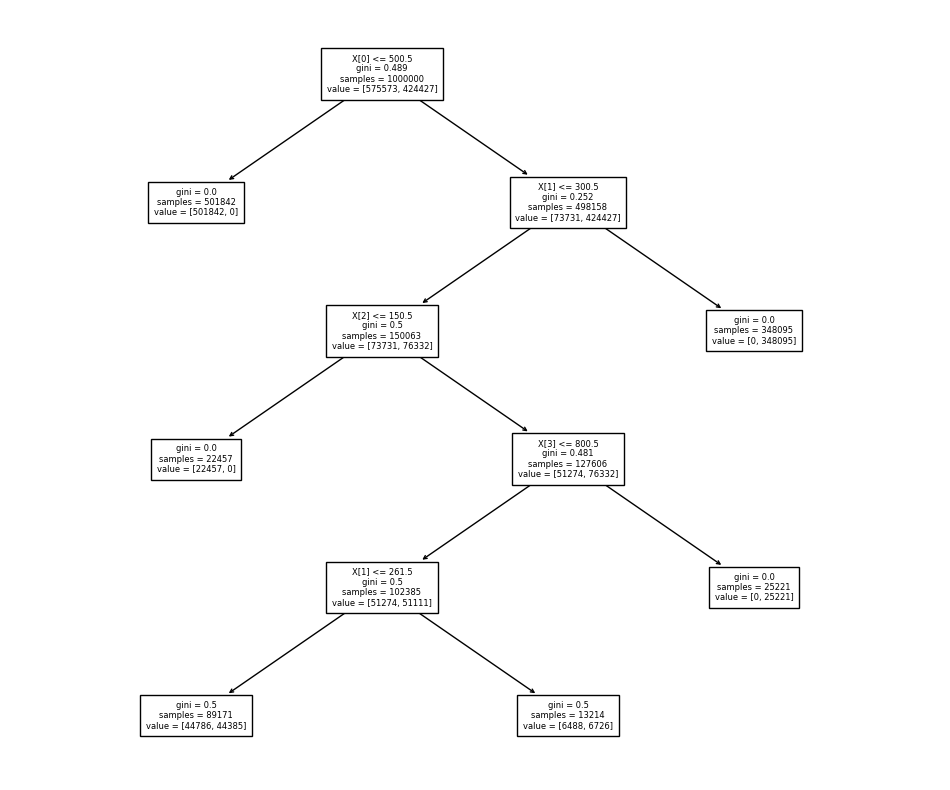

In [7]:
plt.figure(figsize=(12,10))  # set plot size (denoted in inches)
tree.plot_tree(min_sample_tree, fontsize=6)
plt.show()


# save plot
# plt.savefig('tree_high_dpi', dpi=100)

### min_samples_leaf = 10000 . При выхоже из ноды происходит сравнение на размер min sample. Если он органичен, то заканчивается

In [8]:
min_sample_leaf_tree = tree.DecisionTreeClassifier(min_samples_split=50000)
min_sample_leaf_tree = min_sample_leaf_tree.fit(X, y)

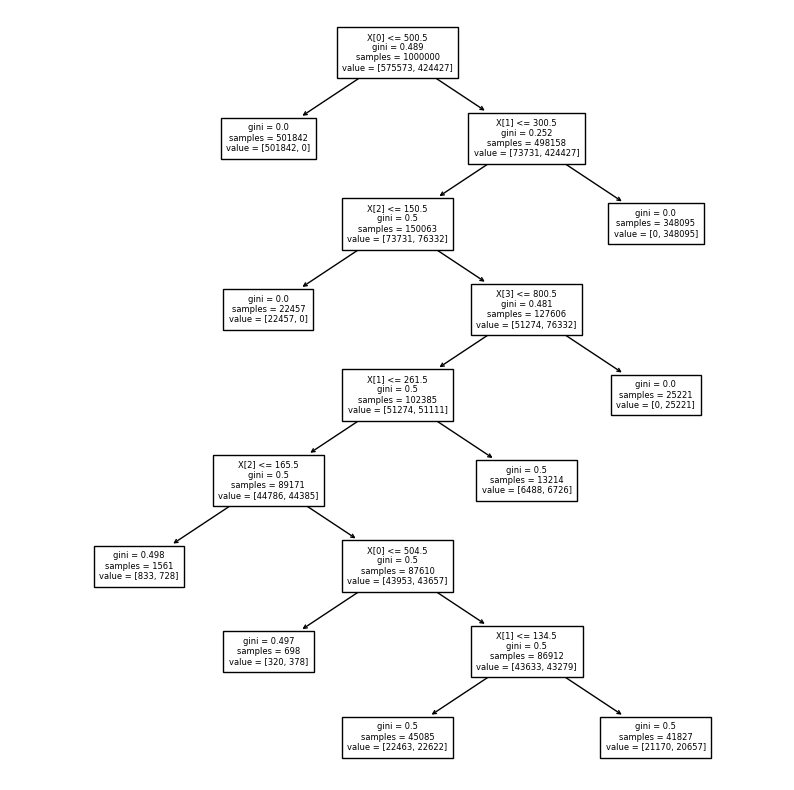

In [9]:
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(min_sample_leaf_tree, fontsize=6)
plt.show()


# save plot
# plt.savefig('tree_high_dpi', dpi=100)

### min_leaf_nodes = n . Ограничивает количество листьев до n

In [10]:
min_leaf_nodes_tree = tree.DecisionTreeClassifier(min_samples_split=50000)
min_leaf_nodes_tree = min_leaf_nodes_tree.fit(X, y)

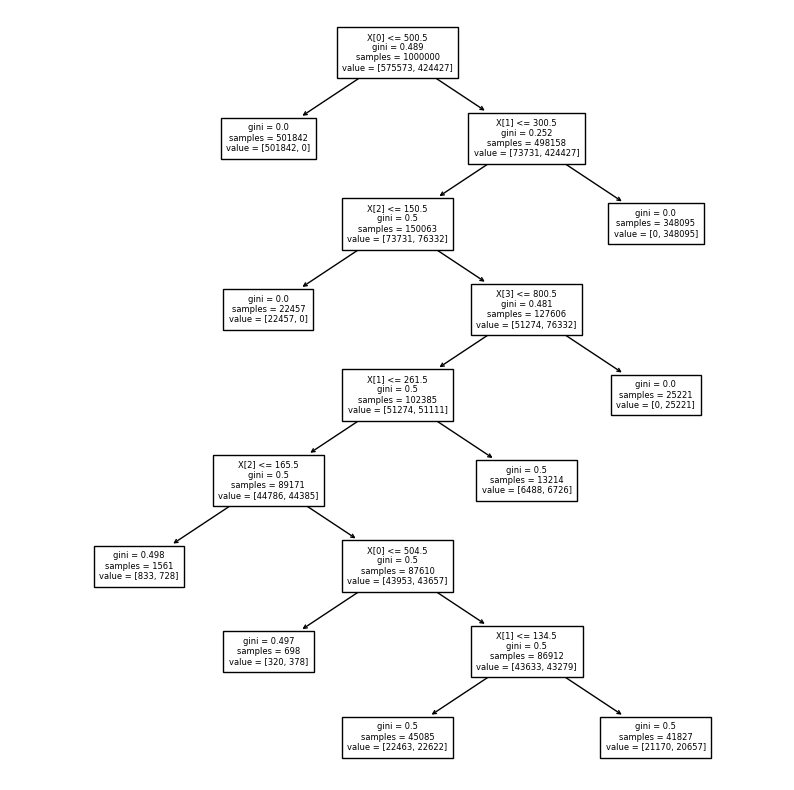

In [11]:
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(min_leaf_nodes_tree, fontsize=6)
plt.show()


# save plot
# plt.savefig('tree_high_dpi', dpi=100)

# Задание:Датасет с разделение данных по наклонной линии

In [12]:
f = open('../datasets/source.dat', 'r')
X = []
y = []
for row in f:

    a = (list(map(float,row.strip().split())))
    X.append([a[0], a[1]])
    y.append(int(a[2]))

# print(X[:10])
# print(Y[:10])

In [13]:
source_dat_tree = tree.DecisionTreeClassifier()
source_dat_tree = source_dat_tree.fit(X, y)

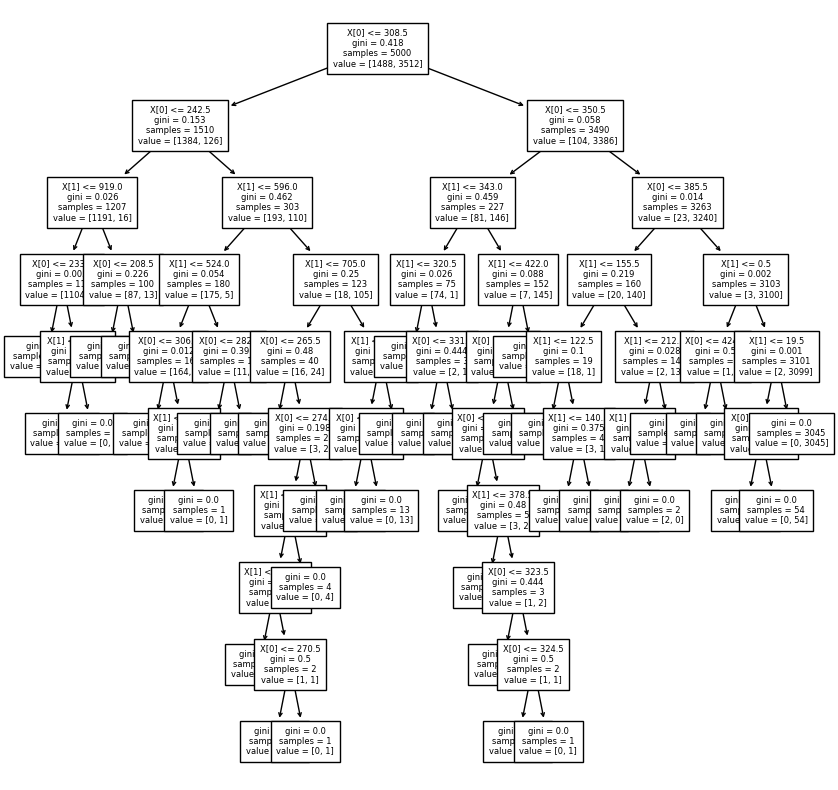

In [14]:
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(source_dat_tree, fontsize=6)
plt.show()


# save plot
# plt.savefig('tree_high_dpi', dpi=100)

In [15]:
f = open('../datasets/source.dat', 'r')
X = []
y = []
for row in f:

    a = (list(map(float,row.strip().split())))
    X.append([float(a[0]),  float(a[0]+0.2*a[1])])
    y.append(int(a[2]))

# print(X[:10])
# print(Y[:10])

In [16]:
source_dat_inclined_tree = tree.DecisionTreeClassifier()
source_dat_inclined_tree = source_dat_inclined_tree.fit(X, y)

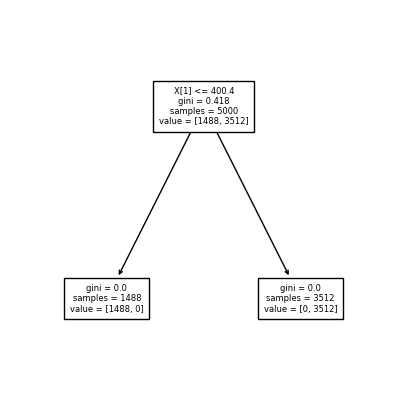

In [17]:
plt.figure(figsize=(5,5))  # set plot size (denoted in inches)
tree.plot_tree(source_dat_inclined_tree, fontsize=6)
plt.show()


# save plot
# plt.savefig('tree_high_dpi', dpi=100)

## Задание:Построить дерево по ZipCode из файла

In [18]:
f = open('../datasets/res.txt', 'r')
X = []
y = []
i = 1
for row in f:
    if row:
        a = list(map(int,row.strip()[:-1]))
        X.append(a)
        y.append(i)
        i += 1

# print(X[:10])
# print(Y[:10])

In [19]:
zipcode_tree = tree.DecisionTreeClassifier()
zipcode_tree = zipcode_tree.fit(X, y)

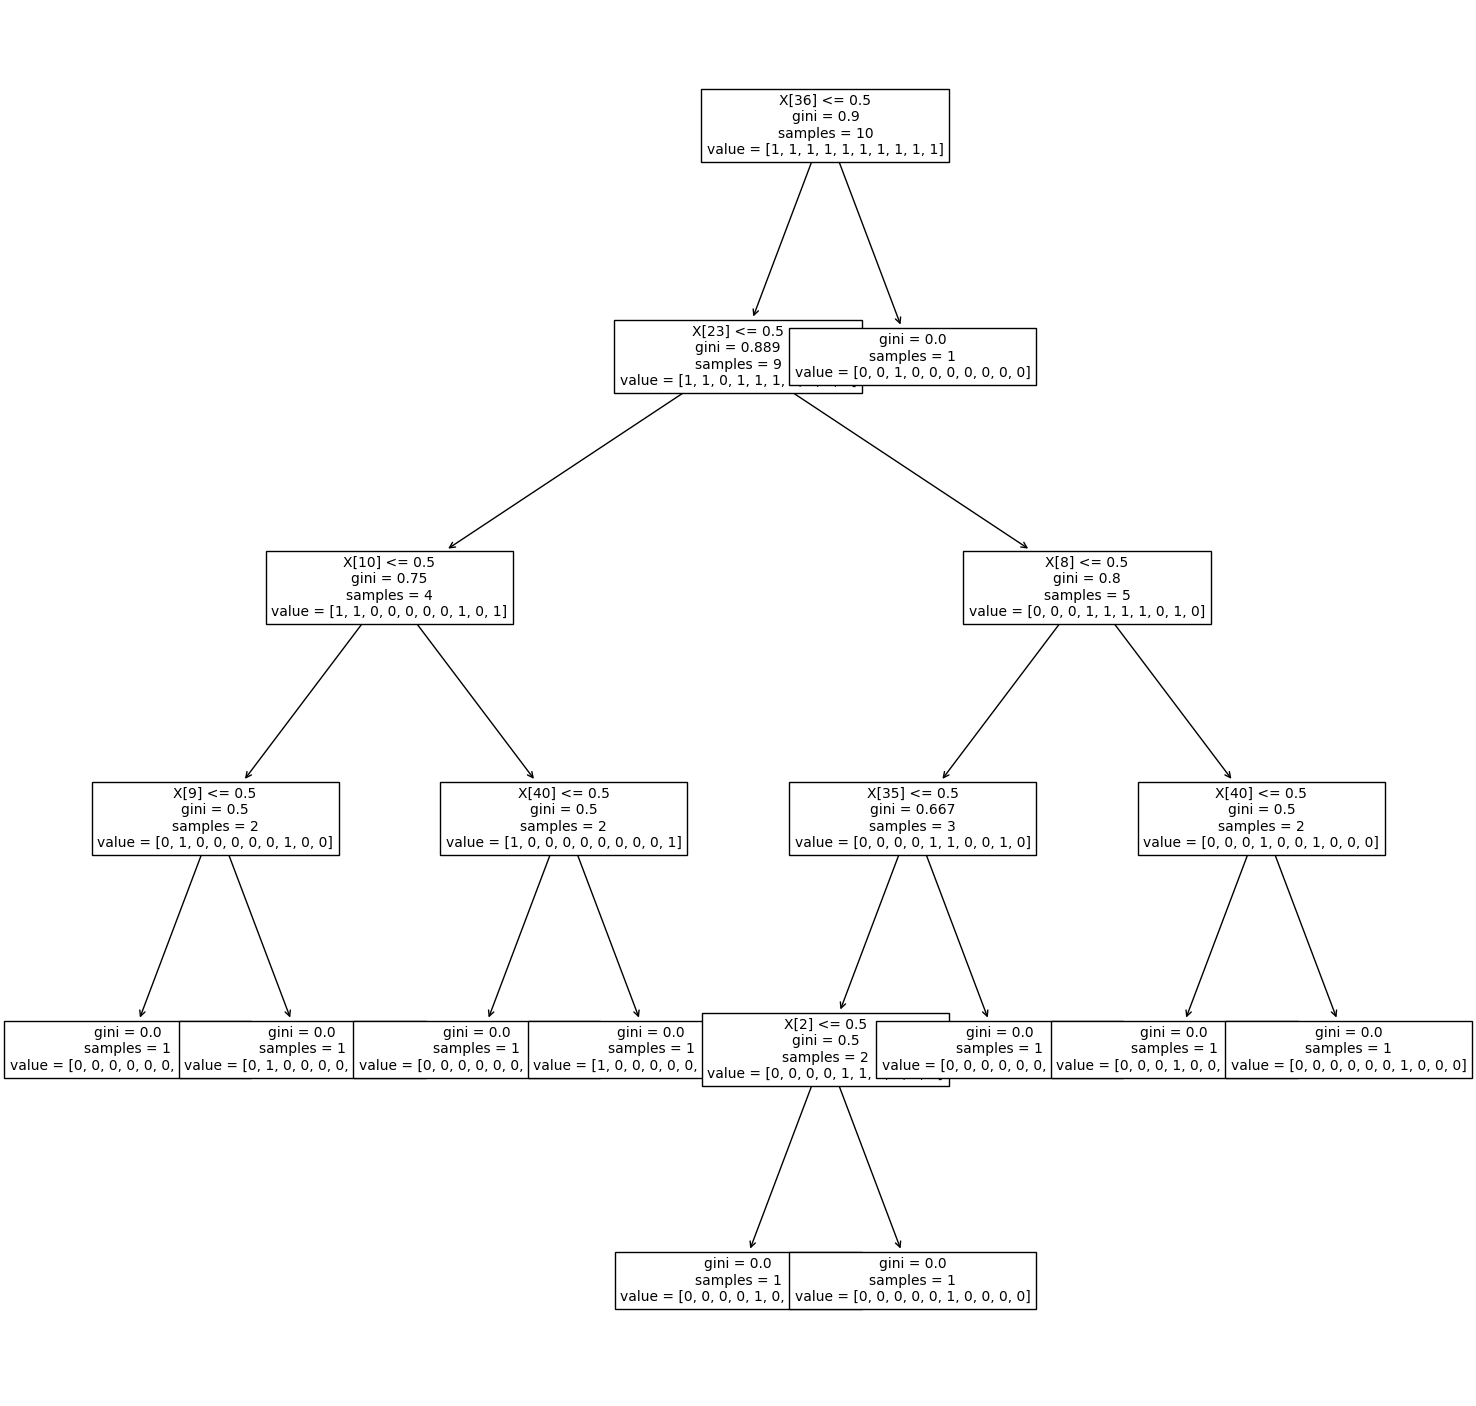

In [20]:
plt.figure(figsize=(18,18))  # set plot size (denoted in inches)
tree.plot_tree(zipcode_tree, fontsize=10)
plt.show()


# save plot
# plt.savefig('tree_high_dpi', dpi=100)

In [21]:
dot_data = tree.export_graphviz(zipcode_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree_orig")

'mytree_orig.pdf'

## Метод главных компонентов(principal component analysis, PCA)
Можно перейти из одного базиса в другой. Происходит поворот, скалирование, поворот
В питоне реализуется через PCA

Такое разложение позволяет уменьшить количество исходных векторов путем выкидывания зависимых столбцов. Анализируется уже измененный датасет

Если сингулярное значение очень мало, тогда такой переменной можно пренебречь

In [22]:
f = open('../datasets/source2.dat', 'r')
X = []
y = []
a = []
i = 1
for row in f:
    if row:
        cols = list(map(float, row.strip().split()))
        a.append(cols)
        X.append(cols[1:])
        y.append(cols[0])
        i += 1


# print(X[:5])
# print(y[:5])

In [23]:
num_X = 1
pca = PCA()
k = pca.fit_transform(X, y)
print('Гланые компоненты',pca.components_[1])
print('Сингулярные значения', pca.singular_values_)
print('коэффициент разложения', k[1])

Гланые компоненты [ 7.87501907e-03 -2.31466532e-01  2.29326829e-04  7.87501907e-03
 -1.03957463e-01  6.76305241e-05  7.87501907e-03 -1.55872935e-01
 -1.22198355e-04  7.87501907e-03  1.70111317e-01  1.01282212e-05
  7.87501907e-03  8.22897222e-01  2.63467172e-04  7.87501907e-03
  5.07301326e-02 -1.11845145e-04  7.87501907e-03 -4.49682342e-01]
Сингулярные значения [4.46530914e+04 1.90736307e+03 1.88711646e+03 1.86723043e+03
 1.81565203e+03 1.77852079e+03 1.72202041e+03 9.75300970e+02
 1.67684187e+01 1.60852628e+01 1.57983633e+01 1.54968099e+01
 1.52168678e+01 1.48485096e+01 1.61154143e-12 3.84034139e-13
 7.56425386e-14 2.05329816e-15 1.05393639e-15 1.87399834e-16]
коэффициент разложения [ 2.40643512e+03 -1.00851010e+01 -6.77182543e+01 -4.28156738e+01
  3.94446691e+01  5.64383898e+01  6.63416466e+01  4.01139591e+00
  1.19810026e+00 -7.48438632e-02 -2.98781952e-02  1.83235746e-01
 -7.55879426e-02  1.07823012e-01  8.35760808e-15 -1.45961805e-14
 -2.56281353e-15  2.23200547e-17 -2.70585307e-

## Построение дереве с PCA

In [25]:
f = open('../datasets/res.txt', 'r')
X = []
y = []
i = 1
for row in f:
    if row:
        cols = list(map(int,row.strip()[:-1]))
        X.append(cols)
        y.append(i)
        i += 1

scaler = StandardScaler()
scaler.fit(X)
train_X = scaler.transform(X)
pca = PCA(0.99)
k = pca.fit_transform(train_X)

clf1 = tree.DecisionTreeClassifier(min_weight_fraction_leaf=0.001, max_depth=15)
clf1 = clf1.fit(k, y)
dot_data = tree.export_graphviz(clf1, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree_orig")

'mytree_orig.pdf'